In [8]:
cd ../..

/media/joshua/Milano


In [9]:
from visualization import VisualModel, Visual_loss
from pathlib import Path

In [10]:
from src.helpers import list_avail_model_names

list_avail_model_names()

['google/vit-base-patch16-224', 'resnet18']

In [36]:
CONFIG = {
    'epoch': 30,
    'batch_size': 20,
    'load_new_model': True,
    'new_model_name': 'google/vit-base-patch16-224' ,  # for 'load_new_model' = True
    'resumed_model_path': Path(""),  # for 'load_new_model' = False
    'output_folder': Path("/media/joshua/Milano/Lensing_Sim_Data/saved_model"),  # needs to be non-existing
    'dataset_folder': Path("/media/joshua/Milano/Lensing_Sim_Data/dev_90000"),
    'init_learning_rate': 1e-3,
    'target_keys_weights': {
        "theta_E": 1, 
        "gamma": 1, 
        "center_x": 1, 
        "center_y": 1, 
        "e1": 1, 
        "e2": 1, 
        "gamma_ext": 1, 
        "psi_ext": 1, 
        "lens_light_R_sersic": 1, 
        "lens_light_n_sersic": 1,
    }
}

In [37]:
!dir {CONFIG["output_folder"]}

CONFIG.npy		       epoch_4_testloss_0.005291.mdl  test_history.npy
epoch_0_testloss_0.012578.mdl  epoch_5_testloss_0.004886.mdl  train_history.npy
epoch_1_testloss_0.006864.mdl  epoch_7_testloss_0.004749.mdl
epoch_2_testloss_0.005890.mdl  epoch_8_testloss_0.004436.mdl


In [38]:
visual_loss = Visual_loss(CONFIG)

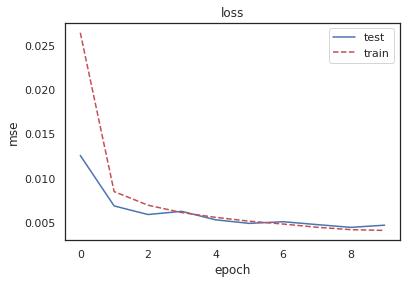

In [39]:
visual_loss.plot_train_test_loss()

In [40]:
model_path = "/media/joshua/Milano/Lensing_Sim_Data/saved_model/epoch_8_testloss_0.004436.mdl"
visual=VisualModel(CONFIG,model_path)

Use device = cuda:0

Number of train samples = 72000
Number of test samples = 18000
 


100%|██████████| 900/900 [02:43<00:00,  5.52it/s]


theta_E: truth =  1.1818, pred =  1.2106, sigma =  0.04
center_x: truth =  0.0284, pred =  0.0298, sigma =  0.01
center_y: truth = -0.0045, pred =  0.0051, sigma =  0.01
e1: truth = -0.2398, pred = -0.2613, sigma =  0.03
e2: truth =  0.0522, pred =  0.0711, sigma =  0.04


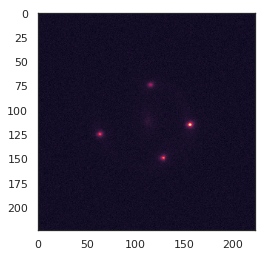

theta_E: truth =  1.1862, pred =  1.2375, sigma =  0.02
center_x: truth = -0.0089, pred = -0.0126, sigma =  0.00
center_y: truth = -0.0049, pred = -0.0044, sigma =  0.00
e1: truth = -0.0429, pred = -0.0853, sigma =  0.02
e2: truth = -0.0552, pred = -0.0186, sigma =  0.02


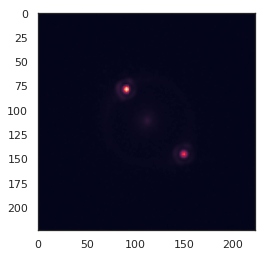

theta_E: truth =  1.4725, pred =  1.5165, sigma =  0.03
center_x: truth =  0.0144, pred =  0.0172, sigma =  0.00
center_y: truth =  0.0203, pred =  0.0197, sigma =  0.00
e1: truth =  0.0412, pred =  0.0655, sigma =  0.02
e2: truth = -0.0668, pred = -0.0589, sigma =  0.02


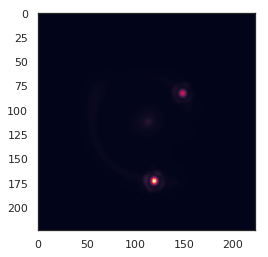

theta_E: truth =  1.3812, pred =  1.4081, sigma =  0.04
center_x: truth =  0.0221, pred =  0.0207, sigma =  0.01
center_y: truth =  0.0176, pred =  0.0150, sigma =  0.01
e1: truth =  0.0793, pred =  0.0628, sigma =  0.04
e2: truth =  0.0511, pred =  0.0788, sigma =  0.03


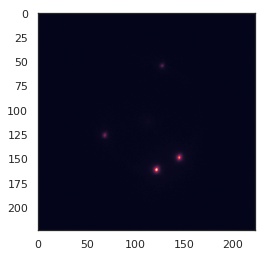

In [41]:
visual.show_a_few_samples_uncertainty(4,1)

In [23]:
pred_dict, truth_dict, sigma_dict = visual.get_pred_truth_dicts()

100%|██████████| 900/900 [02:44<00:00,  5.49it/s]


In [42]:
import numpy as np
diff_theta_E = pred_dict['theta_E'] - truth_dict['theta_E']

np.mean(diff_theta_E**2)**0.5

0.07846825176662554

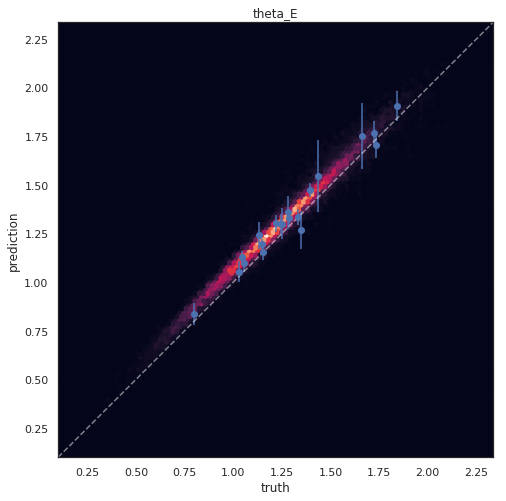

<Figure size 216x216 with 0 Axes>

In [43]:
visual.plot_each_pred_truth_uncertainty('theta_E')